# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exploring-and-understanding-data" data-toc-modified-id="Exploring-and-understanding-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring and understanding data</a></div><div class="lev1 toc-item"><a href="#What-is-tabular-data?" data-toc-modified-id="What-is-tabular-data?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is tabular data?</a></div><div class="lev1 toc-item"><a href="#Pandas" data-toc-modified-id="Pandas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pandas</a></div><div class="lev2 toc-item"><a href="#The-Series-and-DataFrame" data-toc-modified-id="The-Series-and-DataFrame-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The Series and DataFrame</a></div><div class="lev1 toc-item"><a href="#The-process-of-exploratory-data-analysis" data-toc-modified-id="The-process-of-exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The process of exploratory data analysis</a></div><div class="lev2 toc-item"><a href="#The-10,000-foot-view" data-toc-modified-id="The-10,000-foot-view-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The 10,000-foot view</a></div><div class="lev2 toc-item"><a href="#Univariate" data-toc-modified-id="Univariate-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Univariate</a></div><div class="lev3 toc-item"><a href="#An-aside:-the-difference-between-standard-deviation-and-sample-deviation" data-toc-modified-id="An-aside:-the-difference-between-standard-deviation-and-sample-deviation-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>An aside: the difference between standard deviation and sample deviation</a></div><div class="lev3 toc-item"><a href="#Visualizing-a-DataFrame" data-toc-modified-id="Visualizing-a-DataFrame-422"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Visualizing a DataFrame</a></div><div class="lev2 toc-item"><a href="#Multivariate" data-toc-modified-id="Multivariate-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Multivariate</a></div><div class="lev1 toc-item"><a href="#More-advanced-Pandas" data-toc-modified-id="More-advanced-Pandas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>More advanced Pandas</a></div><div class="lev2 toc-item"><a href="#Dealing-with-dates" data-toc-modified-id="Dealing-with-dates-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dealing with dates</a></div><div class="lev2 toc-item"><a href="#Missing-data" data-toc-modified-id="Missing-data-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Missing data</a></div><div class="lev2 toc-item"><a href="#Understanding-distributions" data-toc-modified-id="Understanding-distributions-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Understanding distributions</a></div><div class="lev2 toc-item"><a href="#Grouping" data-toc-modified-id="Grouping-54"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Grouping</a></div>

In [2]:
%matplotlib inline

# Exploring and understanding data

Today we're going to use a tabular dataset to get hands-on experience with two other core Python data science libraries: pandas and matplotlib. We're going to use these libraries to explore, do statistics on, and visualize different parts of our dataset to get a handle on what's there.

# What is tabular data?

The tabular format is fundamental to data science. We got a taste of tabular data last week when we loaded CSV and JSON data, but let's take a closer look now.

Most people are familiar with tabular data from working with spreadsheet software like Excel. In a table, "records" or "samples" are stored in rows, and "features" or "attributes" are stored in columns. For example, in the `good_movies.csv` dataset that we took a look at last week, there were 7 columns representing the fields `title`, `year`, `oscar_nominations`, `short_summary`, `star_1`, `star_2`, and `star_3` and 4 rows representing the movies *La La Land*, *Moonlight*, *Argo*, and *Gone Girl*.

![](images/good_movies_table.png)

In other words, the rows are individual movies, and the columns represent pieces of information that we know about each movie.

# Pandas

Pandas is the Swiss Army Knife of data analysis in Python. Built on top of NumPy, Pandas wraps arrays with additional functions and metadata to create data frames, a paradigm for storing tabular data borrowed from R.

## The Series and DataFrame

Let's use Pandas to read and explore the `good_movies.csv` dataset again:

In [3]:
import pandas as pd

good_movies = pd.read_csv('data/good_movies.csv')

In [4]:
good_movies.head()

,title,year,oscar_nominations,short_summary,star_1,star_2,star_3
0,La La Land,2016,14,A jazz pianist falls for an apsiring actres in...,Ryan Gosling,Emma Stone,Rosemarie DeWitt
1,Moonlight,2016,8,A timeless story of human self-discovery and c...,Mahershala Ali,Sheriff Earp,Duan Sanderson
2,Argo,2012,3,Acting under the cover of a Hollywood producer...,Ben Affleck,Bryan Cranston,John Goodman
3,Gone Girl,2014,1,With his wife's disappearance having become th...,Ben Affleck,Rosamund Pike,Neil Patrick Harris


Pandas automatically gives each row an integer index that guarantees the row can be uniquely identified, but otherwise, the data is exactly the same. The `good_movies.head()` method prints out a few rows from the "head" (top) of the dataset. Since there were only 4 rows in this dataset, `head` prints them all.

There are lots of other ways of reading in data as well (we won't cover these):

- `read_json`
- `read_excel`
- `read_sql`
- `read_html`
- `read_clipboard`
- `read_pickle`

How exactly does Pandas hold the data?

In [5]:
type(good_movies)

pandas.core.frame.DataFrame

One of the fundamental data structures in Pandas is the DataFrame, which stores 2-dimensional (i.e. tabular/matrix) data. The Pandas DataFrame is basically an ordered collection of heterogeneous *Series* of 1-dimensional data.

There are a few core methods for understanding DataFrames that will be important to understand. We already saw `head()` for print the first several rows of a DataFrame. Some others are:

In [6]:
good_movies.shape    # dataset has 4 rows and 7 columns

(4, 7)

In [7]:
good_movies.info()    # tell me some basic info about what's in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
title                4 non-null object
year                 4 non-null int64
oscar_nominations    4 non-null int64
short_summary        4 non-null object
star_1               4 non-null object
star_2               4 non-null object
star_3               4 non-null object
dtypes: int64(2), object(5)
memory usage: 304.0+ bytes


In [8]:
good_movies.describe()    # give some summary statistics for the numeric columns

,year,oscar_nominations
count,4.000000,4.000000
mean,2014.500000,6.500000
std,1.914854,5.802298
min,2012.000000,1.000000
25%,2013.500000,2.500000
50%,2015.000000,5.500000
75%,2016.000000,9.500000
max,2016.000000,14.000000


Indexing Pandas DataFrames is a bit different than NumPy. In particular, you can index by the *name* of rows and columns with `loc` or by their *index* with `iloc`. For example, if we wanted to see the summary of *Gone Girl*, we could use:

In [9]:
gone_girl_summary = good_movies.loc[3, 'short_summary']
print(gone_girl_summary)

With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.


In [10]:
gone_girl_summary = good_movies.iloc[3, 3]
print(gone_girl_summary)

With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.


**Question**: Why did the first value in the index argument not change?

Or, instead, we can retrieve *all* of the summaries:

In [11]:
summaries = good_movies.loc[:, 'short_summary']
print(summaries)

0    A jazz pianist falls for an apsiring actres in...
1    A timeless story of human self-discovery and c...
2    Acting under the cover of a Hollywood producer...
3    With his wife's disappearance having become th...
Name: short_summary, dtype: object


In [12]:
summaries = good_movies.iloc[:, 3]    # short_summaries is the third column
print(summaries)

0    A jazz pianist falls for an apsiring actres in...
1    A timeless story of human self-discovery and c...
2    Acting under the cover of a Hollywood producer...
3    With his wife's disappearance having become th...
Name: short_summary, dtype: object


Speaking of columns, how are these columns from our dataset being stored after we extract them from our original DataFrame?

In [13]:
type(summaries)

pandas.core.series.Series

The `Series` object is another fundamental data type in Pandas. `Series` objects store 1-dimensional (i.e. vector) data, like a single column of a `DataFrame`.

For dealing with tabular data, `Series` and `DataFrames` are much more powerful than pure NumPy arrays. For example, we're not forced to index rows by integers; we can specify a column (as long as it contains unique elements) to use as an index:

In [14]:
good_movies = pd.read_csv('data/good_movies.csv', index_col='title')
good_movies.head()

,year,oscar_nominations,short_summary,star_1,star_2,star_3
title,,,,,,
La La Land,2016,14,A jazz pianist falls for an apsiring actres in...,Ryan Gosling,Emma Stone,Rosemarie DeWitt
Moonlight,2016,8,A timeless story of human self-discovery and c...,Mahershala Ali,Sheriff Earp,Duan Sanderson
Argo,2012,3,Acting under the cover of a Hollywood producer...,Ben Affleck,Bryan Cranston,John Goodman
Gone Girl,2014,1,With his wife's disappearance having become th...,Ben Affleck,Rosamund Pike,Neil Patrick Harris


In [15]:
good_movies.loc['Gone Girl', 'short_summary']

"With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent."

In [16]:
summaries = good_movies.loc[:, 'short_summary']
summaries.loc['Gone Girl']

"With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent."

How is data stored in each of these series?

In [17]:
type(summaries.values)

numpy.ndarray

It's also easy to filter rows on certain conditions:

In [18]:
good_movies[good_movies['oscar_nominations'] > 5]

,year,oscar_nominations,short_summary,star_1,star_2,star_3
title,,,,,,
La La Land,2016,14,A jazz pianist falls for an apsiring actres in...,Ryan Gosling,Emma Stone,Rosemarie DeWitt
Moonlight,2016,8,A timeless story of human self-discovery and c...,Mahershala Ali,Sheriff Earp,Duan Sanderson


It's also very convenient to do arithmetic and summary statistics on the data:

In [19]:
good_movies['oscar_nominations'].count()

4

In [20]:
good_movies['oscar_nominations'].sum()

26

In [21]:
good_movies['oscar_nominations'].mean()

6.5

In [22]:
good_movies['oscar_nominations'].median()

5.5

In [23]:
good_movies['oscar_nominations'].std()

5.802298395176403

**Your Turn**

![](images/titanic.jpg)

For the rest of the class, we're going to dive deep into the passengers of the *RMS Titanic*. The file `data/titanic.csv` contains the following data on each of the passengers:

- pclass: Passenger class (1 = first; 2 = second; 3 = third)
- survived: Survival (0 = no; 1 = yes)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)

Questions to answer:

- Read `data/titanic.csv` into a Pandas DataFrame. What is the best index for rows?
- What was the average and median ages of passengers?
- What was the overall survival rate?
- What was the price of the most expensive ticket? Whose tickets were they?
- How many passengers had no family on board?

# The process of exploratory data analysis

When we get a new tabular dataset that we don't know anything about, there is a fairly standard process of exploration that we can do on that dataset to get a better handle on it:

- Get some really general information about the dataset as a whole
- Dig into each column individually
- Try to understand the relationships *between* columns

To illustrate the process, we'll use a mystery dataset that we don't know anything about:

In [25]:
mystery_data = pd.read_csv('data/mystery.csv', index_col=None)

## The 10,000-foot view

A few questions we should ask:

- How many rows are there?
- How many columns are there?
- What are the datatypes of each column?
- How many missing values (if any) are there?

The Pandas built-in `.info()` method gives a great, quick answer to these questions:

In [28]:
mystery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
A    1000 non-null float64
B    1000 non-null float64
C    1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


And we can use head to look at some actual values in the columns:

In [29]:
mystery_data.head()

,A,B,C
0,3.890434,2.931623,-2.112580
1,2.914978,23.616528,-2.428007
2,3.199599,6.631438,1.009967
3,2.138803,3.017254,5.043213
4,3.271672,0.998152,0.837330


## Univariate

For each column, we should then ask:

- What are the *central tendancies* of the column
    - "Central tendancies" = "typical" value(s)
    - Especially - Mean, median, mode
- What is the *spread* of the data?
    - Often, variance/standard deviation
    - But can also be: quartiles (or other percentiles), min/max values, etc
- What the distribution *look like*?

Again, Pandas provides a convenient way of looking at the usual univariate statistics:

In [31]:
mystery_data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,2.999479,5.009122,1.449692
std,0.974309,5.238053,2.967769
min,-0.351074,0.000923,-6.768514
25%,2.282697,1.465345,-1.136988
50%,3.009535,3.301798,3.089988
75%,3.628123,6.728020,4.019302
max,6.186565,41.779944,5.637442


In [44]:
for col in mystery_data.columns:
    print('median of col {}: {}'.format(col, mystery_data.loc[:, col].median()))

median of col A: 3.0095353107485696
median of col B: 3.3017982435008992
median of col C: 3.0899876331989136


What does it mean for a column to have a median and mean that are different?

### An aside: the difference between standard deviation and sample deviation

Sometimes, you'll see two slightly different definitions for the "spread" of a column of data - the standard deviation:

$\sigma_X = \sqrt{ \frac{1}{n}\sum_i^n (x_i - \mu_X) }$

and the sample deviation:

$\sigma_X = \sqrt{ \frac{1}{n-1}\sum_i^n (x_i - \mu_X) }$

(where $\mu$ is the mean of the column $X$ and $x_i$ is the $i$th value of $X$). What's the difference between dividing by $n$ and by $n-1$?

The *standard deviation* is used when $X$ contains the *entire population* that you're estimating the width of. So, for example, if you want to know the spread of test scores in a class and you have the score of each and every student, use the standard deviation.

The *sample deviation* is used to correct for bias when you're trying to estimate the width of a population that you only have a sample of data points from. For example, if you are trying to extrapolate the spread of test scores on the SAT by looking at how 1,000 students performed, you should use the *sample deviation*.

In practice, however, standard deviation and sample deviation are very similar if the number of samples is large.

### Visualizing a DataFrame

Summary statistics can only take us so far in understanding the data in a new dataset. Visualizations like histograms are another great way of getting a high-level overview for what the data looks like.

Plotting functionality is built into Pandas. In particular, the built-in plot functions are a thin wrapper around a very powerful data visualization library called matplotlib. We won't directly use matplotlib in this course; we'll do all of our plotting by calling the Pandas wrapper functions. The pure matplotlib functions are very similar, however.

mean: 2.999479189887476
median: 3.0095353107485696
sample deviation: 0.9743090130709517


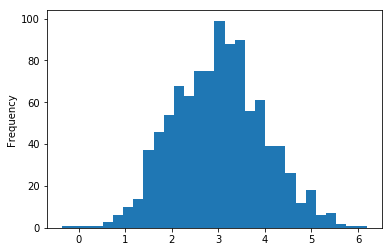

In [40]:
# {dataframe_name}.{column_name}.plot.{plot_type}(plotting options)
mystery_data.A.plot.hist(bins=30)
print('mean: {}'.format(mystery_data.A.mean()))
print('median: {}'.format(mystery_data.A.median()))
print('sample deviation: {}'.format(mystery_data.A.std()))

mean: 5.009122341093529
median: 3.3017982435008992
sample deviation: 5.238052663757595


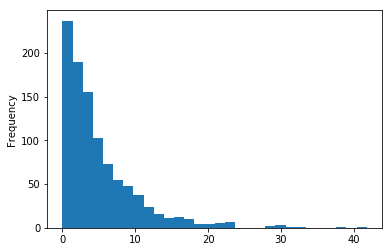

In [41]:
mystery_data.B.plot.hist(bins=30)
print('mean: {}'.format(mystery_data.B.mean()))
print('median: {}'.format(mystery_data.B.median()))
print('sample deviation: {}'.format(mystery_data.B.std()))

mean: 1.449691938550529
median: 3.0899876331989136
sample deviation: 2.967768856430265


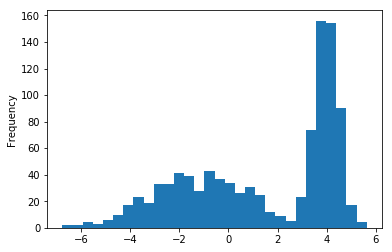

In [42]:
mystery_data.C.plot.hist(bins=30)
print('mean: {}'.format(mystery_data.C.mean()))
print('median: {}'.format(mystery_data.C.median()))
print('sample deviation: {}'.format(mystery_data.C.std()))

**Your turn**

Try following the exploratory data analysis steps on the Titanic dataset (i.e. get the 10,000-foot view, then get some column-by-column insights). What interesting things do you find?

## Multivariate

After understanding what is contained in *each individual column*, it's important to understand how each column is related to the others. The related ideas of *correlation* and *covariance* are common ways of understanding pairwise dependencies between columns.

The *covariance* measures, unsurprisingly, the extent to which two columns co-vary. In other words, how often do values with a large distance from the mean in one column correspond to a large distance from the mean in another column?

The covariance between columns $X$ and $Y$ is defined as:

$ cov(X, Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_X)(y_i - \mu_Y) $

In [43]:
mystery_data.corr()

,A,B,C
A,1.000000,0.002983,0.000306
B,0.002983,1.000000,-0.019404
C,0.000306,-0.019404,1.000000


# More advanced Pandas

## Dealing with dates


## Missing data

how, why, count, drop vs fill
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.04-Missing-Values.ipynb
your turn - what is NaN * number?

## Understanding distributions

value_counts - discrete vs continuous
corr, skew

## Grouping

https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb
https://blog.socialcops.com/engineering/machine-learning-python/

basic grouping, method chaining, 
More granular detail - get survival rates for male vs female, between classes, 
nice long your turn